## Allen-Cahn solidification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [2]:
# for Allen-Cahn equation
M = 1
K = 1
W = 1
# for temperature evolution
Kt = 1
Cv = 1
Lf = 1
Tm = 1
dx = 1.0
dt = 0.1
mesh_x = 400

### Initialization

In [3]:
phi = np.zeros(mesh_x)
phi[0:mesh_x//2] = 1.0 # left is solid phase = phi = 1
T = 0.9*Tm*np.ones(mesh_x)

###  Solidification
#### Allen-Cahn phase evolution equation
The Allen-Cahn functional with the driving force term ($g(T)$) is,
$$ F = \int \big(\frac{K}{2} (\nabla \phi)^2 + f(\phi) + g(T) \big) dx $$
where, 
$$ g(T) = \frac{L_f}{T_m}(T-T_m)h(\phi) .$$

The liquid phase is $\phi = 0$, the solid is $\phi = 1$.

$h(\phi)$ is the interpolation function, given as,
$$ h(\phi) = 3\phi^2 - 2\phi^3 $$
and 
$$ \frac{\partial h(\phi)}{\partial \phi} = 6\phi(1 - \phi). $$
This interpolation function $h(\phi)$ satisfies the following condition,
$$ h(0) = 0 \\
h(1) = 1 \\
\frac{\partial h(0)}{\partial \phi} = \frac{\partial h(1)}{\partial \phi} = 0
$$

Thus the phase evolution equation becomes,
$$ \frac{\partial \phi}{\partial t} = -M\frac{\delta F}{\delta \phi} = -M\Big[\frac{\partial f}{\partial \phi} - K\nabla^2 \phi + \frac{L_f(T-T_m)}{T_m}\frac{\partial h(\phi)}{\partial \phi} \Big] $$

#### Temperature evolution equation
$$ C_v\frac{\partial T}{\partial t} = \Big[ \nabla \cdot K_t\nabla T + L_f \frac{\partial h(\phi)}{\partial \phi} \frac{\partial \phi}{\partial t} \Big] = \Big[ K_t\nabla^2T + L_f \frac{\partial h(\phi)}{\partial \phi} \frac{\partial \phi}{\partial t} \Big] $$

### Function definitions

In [4]:
def h_phi(phi):
    return 3.0*phi**2 - 2*phi**3
def dh_dphi(phi):
    return 6.0*phi*(1.0-phi)
def impose_neumann(phi):
    phi[0] = phi[1]
    phi[mesh_x-1] = phi[mesh_x-2]
    return phi
# copy from Allen Cahn code
def d_free_energy(phi):
    return 2.0*W*phi*(1.0-phi)*(1.0-2*phi) # no biasing term
def laplacian(phi):
    laplacian = np.zeros(mesh_x)
    for i in range(1, mesh_x-1):
        laplacian[i] = (phi[i+1] - 2.0*phi[i] + phi[i-1])/(dx**2)
    return laplacian

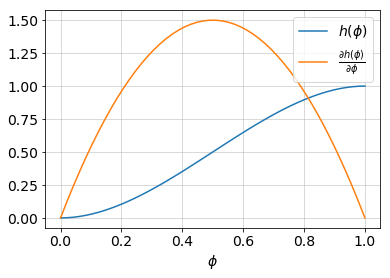

In [5]:
phi_test = np.linspace(0, 1)
plt.plot(phi_test, h_phi(phi_test), label=r"$h(\phi)$")
plt.plot(phi_test, dh_dphi(phi_test), label=r"$\frac{\partial h(\phi)}{\partial \phi}$")
plt.xlabel(r"$\phi$", fontsize=14)
plt.grid(alpha=0.6)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.show()

### time loop

<IPython.core.display.Javascript object>


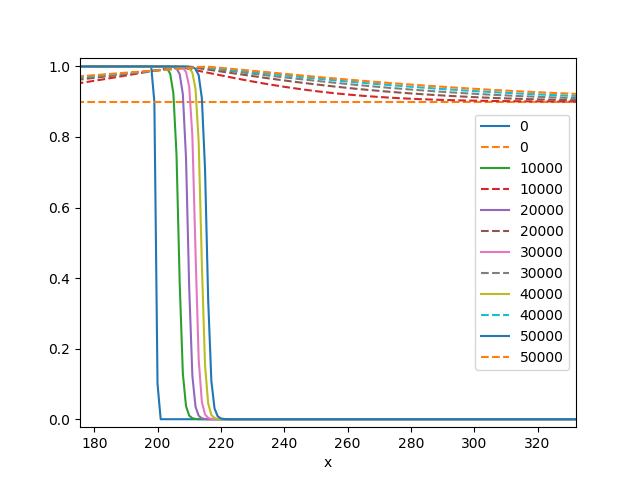

In [6]:
%matplotlib notebook
timesteps = 50001
t_every = 10000
dphi_dt, dT_dt = np.zeros(mesh_x), np.zeros(mesh_x)
for t in range(timesteps):
    dphi_dt = -M*( d_free_energy(phi) - K*laplacian(phi) + Lf*(T-Tm)*dh_dphi(phi)/Tm )
    dT_dt = ( Kt*laplacian(T) + Lf*dh_dphi(phi)*dphi_dt )/Cv
    phi += dphi_dt*dt
    T += dT_dt*dt
    impose_neumann(phi)
    impose_neumann(T)
    if t%t_every == 0:
        plt.plot(phi, '-', label=str(t))
        plt.plot(T, '--', label=str(t))
plt.legend()
plt.xlabel('x')
plt.show()